# Jupyter Notebook for the Stock Prediction Data Analysis ( SPDA )

## Data Source : https://www.kaggle.com/qks1lver/amex-nyse-nasdaq-stock-histories

# Development stages

### 1. [Dataset formatting and freature extraction](#dataset_formatting_and_extraction)
### 2. [Manual model development](#manual_model_development)
### 3. [AutoML development](#automl_development)
### 4. [Model Training and Testing](#model_training_and_testing)

---
---

# Dataset formatting and feature extraction<a id='dataset_formatting_and_extraction'></a>

## a. Setup the links to the data file to be used for model training and testing

In [3]:
# System library for path management
from os import path

# Set the patha for the training and test datafiles
user_home_dir = str(path.expanduser('~'))
print('Home directory for the current user : ', user_home_dir)

Home directory for the current user :  C:\Users\Alpha


In [2]:
# Add path to the sample data file for training and testing models
sample_file_path = ('\\data\\AAL.csv')
print('Path to the data file currently being used : ', sample_file_path)

Path to the data file currently being used :  \data\AAL.csv


## b. Read the data file into a dataframe to be pre-processed

In [3]:
# Import the system built-in modules needed for feature extraction
import os
import time
from datetime import datetime

In [4]:
# Import the essential data processing libraries
import pandas as pd
import numpy as np

In [5]:
# Import visualization libraries for plotting and visualizing the dataset 
# vectors
import matplotlib.pyplot as plt

In [6]:
% matplotlib inline

In [7]:
# Read in the dataset from the csv file, and convert to a Pandas dataframe
sample_dataframe = pd.read_csv(sample_file_path, engine='python', encoding='utf-8 sig')
display(sample_dataframe)

FileNotFoundError: [Errno 2] No such file or directory: '\\data\\AAL.csv'

In [162]:
# Convert the date format in the dataframe into POSIX Timestamps

default_timestamps = sample_dataframe['date'].values
show_values = 5

# Initialize the list for storing POSIX timestamps
posix_timestamps = []

# Transform the datetime into POSIX datetime
for i in range(default_timestamps.shape[0]):
    
    # Collect the logged time value
    timestamp_logged = default_timestamps[i]    
    
    # Convert the logged default timestamp to POSIX and add to the list
    posix_timestamps.append(datetime.strptime(timestamp_logged, '%Y-%m-%d'))
    posix_timestamps[i] = time.mktime(posix_timestamps[i].timetuple())

# Add the list to the dataframe
sample_dataframe['Timestamp'] = posix_timestamps

# Set the POSIX timestamp column to be the index of the dataframe
#sample_dataframe.set_index('Timestamp', inplace=True)

# Sort the POSIX timestamp values in the dataframe
sample_dataframe.sort_values(by=['Timestamp'], inplace=True)

# Give a preview of the re-index dataframe
print('Showing the first %d values from the dataframe.' %(show_values))
sample_dataframe.head(show_values)

Showing the first 5 values from the dataframe.


,date,volume,open,close,high,low,adjclose,Timestamp
3309,2005-09-27,961200,21.049999,19.299999,21.400000,19.100000,18.489122,1.127797e+09
3308,2005-09-28,5747900,19.299999,20.500000,20.530001,19.200001,19.638702,1.127884e+09
3307,2005-09-29,1078200,20.400000,20.209999,20.580000,20.100000,19.360884,1.127970e+09
3306,2005-09-30,3123300,20.260000,21.010000,21.049999,20.180000,20.127277,1.128056e+09
3305,2005-10-03,1057900,20.900000,21.500000,21.750000,20.900000,20.596684,1.128316e+09


## Plot the values in the given dataset

In [163]:
# Extract the values to plot from the dataframe
timestamps = sample_dataframe['Timestamp'].values

df_cols = list(sample_dataframe.columns.values)
df_cols.remove('date')
df_cols.remove('Timestamp')
df_cols.remove('volume')

data_values = []
for col in df_cols:
    values = list(sample_dataframe[col].values)
    data_values.append(values)
 
display(len(data_values))

5

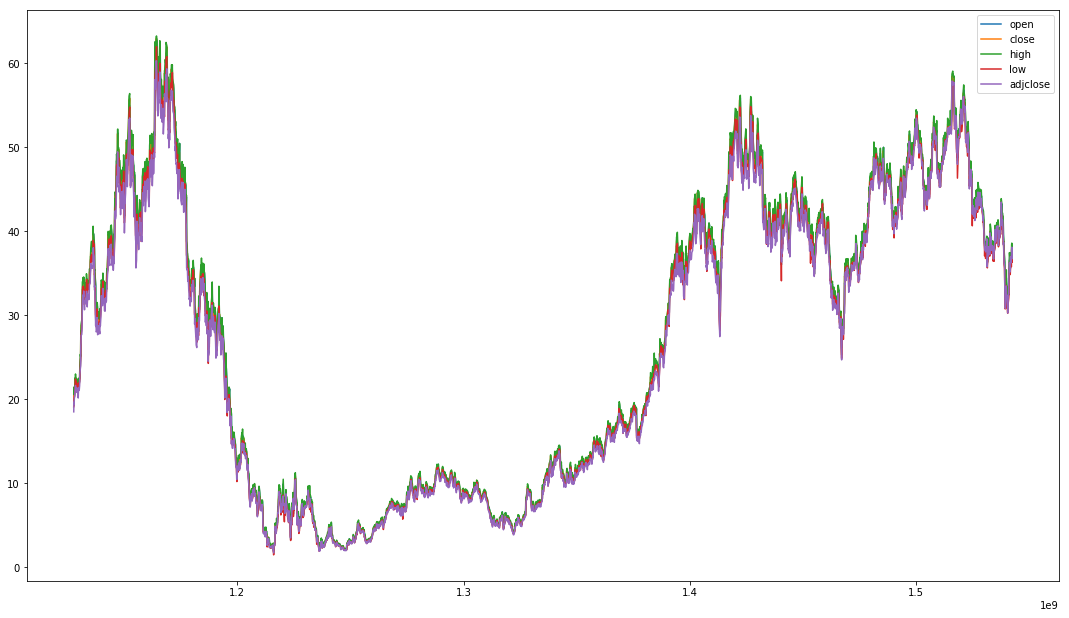

In [164]:
# Import the plotting library
import matplotlib.pyplot as plt

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
fig.savefig('original_dataset.png', dpi=100)
fig.set_size_inches(18.5, 10.5, forward=True)

for i in range(len(data_values)):
    plt.plot(timestamps, data_values[i])

plt.legend(df_cols)
plt.show()
#plt.plot(timestam)

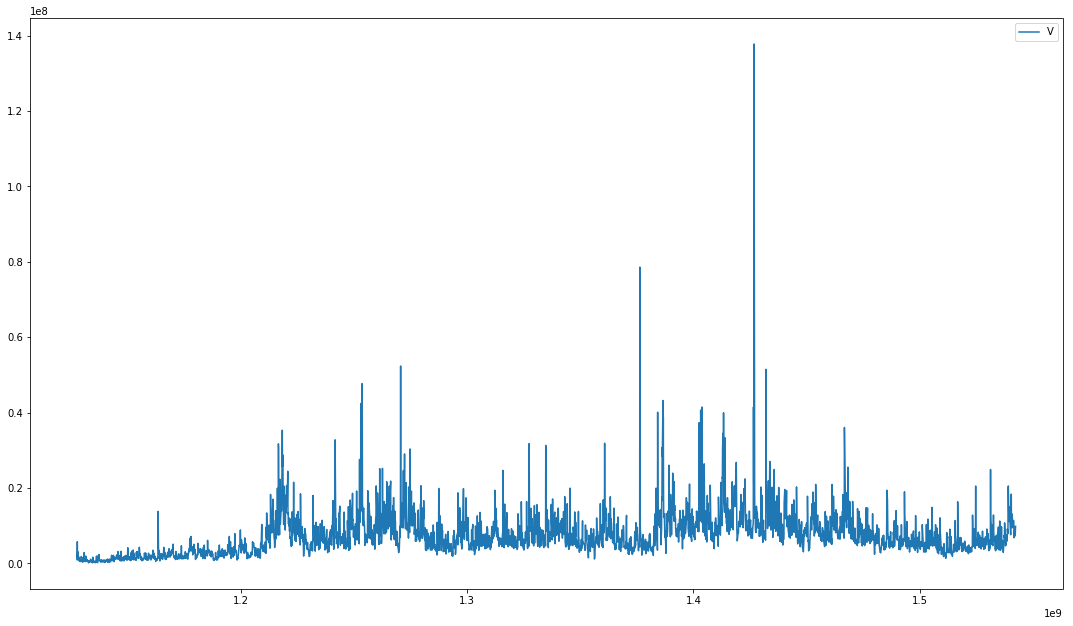

In [165]:
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
fig.savefig('original_dataset_volumne.png', dpi=100)
fig.set_size_inches(18.5, 10.5, forward=True)

plt.plot(timestamps, sample_dataframe['volume'])
plt.legend('Volume')
plt.show()

## Now that the dataframe are constructed, we can start the feature extraction and normalization

In [166]:
# Initialize the list to hold the normalized data valuess
scaled_features = []

# Approach 1 : Using the data from previous 7 days to predict the next day
from sklearn.preprocessing import MinMaxScaler

# Normalize and scale each one of the input features and construct the 
# scaler array for doing inverse scaling later
sample_df_cols = list(sample_dataframe.columns.values)
sample_df_cols.remove('date')

scaler_array = []
scaled_features_dict = {}

for col in sample_df_cols:
    
    # Initialize the scaler for the given feature
    # Range : -1...1
    scaler = MinMaxScaler(feature_range=(-1,1), copy=True)
    
    # Extract the features and fit the scaler
    feature_list = sample_dataframe[col].values.reshape(-1,1)
    scaler.fit(feature_list)
    
    # Add th scaler to the dictionary
    scaler_array.append(scaler)
    
    # Transform the feature dataset
    scaled_feature_list = scaler.transform(feature_list)
    scaled_features.append(scaled_feature_list)
    scaled_features_dict[col] = scaled_feature_list
    
display(scaled_features)

C:\Users\Alpha\AppData\Local\conda\conda\envs\comp_4710\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


[array([[-0.98804464],
        [-0.91848503],
        [-0.98634442],
        ...,
        [-0.89609871],
        [-0.88144624],
        [-0.85912312]]), array([[-0.36804076],
        [-0.42552146],
        [-0.38939072],
        ...,
        [ 0.18870092],
        [ 0.18443089],
        [ 0.1689933 ]]), array([[-0.42670374],
        [-0.38748162],
        [-0.39696032],
        ...,
        [ 0.18810264],
        [ 0.17862393],
        [ 0.14365091]]), array([[-0.36740694],
        [-0.39581971],
        [-0.39418681],
        ...,
        [ 0.19399085],
        [ 0.17994773],
        [ 0.15937291]]), array([[-0.41701072],
        [-0.41370766],
        [-0.38398017],
        ...,
        [ 0.18909994],
        [ 0.15144513],
        [ 0.15772089]]), array([[-0.4267036 ],
        [-0.38748159],
        [-0.39696036],
        ...,
        [ 0.24273242],
        [ 0.23283801],
        [ 0.19633117]]), array([[-1.        ],
        [-0.99958316],
        [-0.99916633],
        ...,
      

In [42]:
# Construct the Numpy array to hold the data values
scaled_features = np.array(scaled_features)
scaled_features = np.transpose(scaled_features).reshape(scaled_features.shape[1],
                                           scaled_features.shape[2])

# Determine the dimenstions on the input dataset
print('Dimensions of the input dataset : ', scaled_features.shape)

Dimensions of the input dataset :  (3310, 7)


## Split the dataset into training and testing 

In [54]:
def make_dataset_batchable(data_array_in, desired_ratio, batch_size):
      
      # Length of the input dataset and number of batches available
      data_length = data_array_in.shape[0]
      num_batches = int(data_length/batch_size)
      
      # Length of the usable dataset with the given batches
      data_use_len = num_batches * batch_size
      
      if data_use_len < data_length:
          # Format and remove the extra datapoints from the datasets
          actual_data_in = np.delete(data_array_in, np.s_[data_use_len::], axis=0)
      else:
          actual_data_in = data_array_in
      
      # Size of training and testing sets initially available
      train_length = int(desired_ratio * data_use_len)
      test_length = int((1 - desired_ratio) * data_use_len)
      
      # Number of testing and training initially batches available
      num_train_batches = int(train_length / batch_size)
      num_test_batches = int(test_length / batch_size)
      
      # NUmber of data points not used for training and testing
      leftover = data_use_len - (num_train_batches*batch_size) - (
              num_test_batches*batch_size)
      
      # Number of batches available after initial splitting
      leftover_batches = leftover / batch_size
      
      # Calculate the best ratio to use and increase the training size
      actual_ratio = float((batch_size*num_train_batches)+(batch_size*
                      leftover_batches)) / float(data_use_len)
      
      return actual_ratio, actual_data_in

In [55]:
# Make the dataset batchable for the training and testing

batch_size = 7
test_train_ratio = 0.75

ratio_to_use, scaled_features = make_dataset_batchable(scaled_features,
                                                      test_train_ratio,
                                                      batch_size)

In [56]:
# Determine the dimenstions on the input dataset
print('Dimensions of the input dataset : ', scaled_features.shape)

Dimensions of the input dataset :  (3304, 7)


## Now that the input dataset is guaranteed to be batchable, create the training and testing batches

In [58]:
def split_dataset(data_set_in, train_test_ratio):
      
     # Determine the length of the training and testing arrays
     train_size = int(len(data_set_in) * train_test_ratio)
    
     # Split the dataset
     train, test = data_set_in[0:train_size][:], data_set_in[train_size:len(data_set_in)][:]
     
     return train, test

In [59]:
train_dataset, test_dataset = split_dataset(scaled_features, ratio_to_use)

In [62]:
# Display the training dataset to be used for training the network
print('Displaying the training dataset with size : ', train_dataset.shape)
display(train_dataset)

Displaying the training dataset with size :  (2478, 7)


array([[-0.98804464, -0.91848503, -0.98634442, ..., -0.98663941,
        -0.97630872, -0.98887151],
       [-0.97855534, -0.99106436, -0.99418435, ..., -0.98874653,
        -0.99429189, -0.98911128],
       [-0.99526988, -0.97563008, -0.98070897, ..., -0.98868695,
        -0.99461885, -0.99565788],
       ...,
       [-0.79702564, -0.82382741, -0.77774137, ..., -0.75257392,
        -0.72609899, -0.70256579],
       [-0.728387  , -0.77153126, -0.7986599 , ..., -0.81238761,
        -0.81206076, -0.88658273],
       [-0.84409219, -0.87024024, -0.85553191, ..., -0.89736888,
        -0.91338452, -0.91109655]])

In [63]:
# Display the testing dataset to be used for testing the network
print('Displaying the testing dataset with size : ', test_dataset.shape)
display(test_dataset)

Displaying the testing dataset with size :  (826, 7)


array([[-0.89050498, -0.86599116, -0.86468374, ..., -0.89017813,
        -0.86141527, -0.8558588 ],
       [-0.84016993, -0.81336816, -0.79964044, ..., -0.81892462,
        -0.844419  , -0.83918941],
       [-0.84997546, -0.82382741, -0.81663668, ..., -0.81434872,
        -0.81794414, -0.82088575],
       ...,
       [ 0.96371784,  0.96413467,  0.96455151, ...,  0.96621886,
         0.96663569,  0.96705253],
       [ 0.96746937,  0.9678862 ,  0.96955355, ...,  0.97038722,
         0.97080406,  0.97205457],
       [ 0.97247141,  0.97288824,  0.97330508, ...,  0.97497243,
         0.97538926,  0.9758061 ]])

## Now that the features have been scaled, construct the supervised dataset for generating predictions

## Reshape the input dataset

In [88]:
# Construct the supervised dataset for training the models

# Define the dimenstions of the input dataset to be used for training the
# model

num_past_timestamps = 7
num_future_predictions = 1
num_features = len(sample_df_cols)
num_samples = len(scaled_features[0])

# Method for converting the input dataset to a supervised training dataset
from pandas import DataFrame
from pandas import concat
 
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    """
    Frame a time series as a supervised learning dataset.
    Arguments:
        data: Sequence of observations as a list or NumPy array.
        n_in: Number of lag observations as input (X).
        n_out: Number of observations as output (y).
        dropnan: Boolean whether or not to drop rows with NaN values.
    Returns:
        Pandas DataFrame of series framed for supervised learning.
    """
    
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [89]:
training_input_data = series_to_supervised(data=train_dataset,
                                       n_in=num_past_timestamps,
                                      n_out=num_future_predictions)

In [90]:
test_input_data = series_to_supervised(data=test_dataset,
                                       n_in=num_past_timestamps,
                                      n_out=num_future_predictions)

In [91]:
display(training_input_data)

,var1(t-7),var2(t-7),var3(t-7),var4(t-7),var5(t-7),var6(t-7),var7(t-7),var1(t-6),var2(t-6),var3(t-6),...,var5(t-1),var6(t-1),var7(t-1),var1(t),var2(t),var3(t),var4(t),var5(t),var6(t),var7(t)
7,-0.988045,-0.918485,-0.986344,-0.956625,-0.986639,-0.976309,-0.988872,-0.978555,-0.991064,-0.994184,...,-0.996610,-0.995784,-0.985673,-0.990524,-0.990621,-0.996437,-0.996059,-0.995887,-0.998718,-0.999711
8,-0.978555,-0.991064,-0.994184,-0.990902,-0.988747,-0.994292,-0.989111,-0.995270,-0.975630,-0.980709,...,-0.995887,-0.998718,-0.999711,-0.997451,-0.978080,-0.996528,-0.993809,-0.991823,-0.998412,-0.994848
9,-0.995270,-0.975630,-0.980709,-0.992699,-0.988687,-0.994619,-0.995658,-0.994119,-0.996909,-0.978545,...,-0.991823,-0.998412,-0.994848,-0.995090,-0.997249,-0.999255,-0.999502,-0.987289,-0.973989,-0.997393
10,-0.994119,-0.996909,-0.978545,-0.991747,-0.989416,-0.960303,-0.988845,-0.988751,-0.994937,-0.981741,...,-0.987289,-0.973989,-0.997393,-0.996938,-0.998804,-0.999233,-0.987854,-0.972820,-0.991343,-0.967845
11,-0.988751,-0.994937,-0.981741,-0.982943,-0.973692,-0.984808,-0.986621,-0.990980,-0.994128,-0.987308,...,-0.972820,-0.991343,-0.967845,-0.976238,-0.989556,-0.990551,-0.994299,-0.992583,-0.989860,-0.997454
12,-0.990980,-0.994128,-0.987308,-0.994314,-0.992766,-0.995882,-0.992257,-1.000000,-0.992852,-0.995784,...,-0.992583,-0.989860,-0.997454,-0.994476,-0.988683,-0.994883,-0.990143,-0.990864,-0.996235,-0.994007
13,-1.000000,-0.992852,-0.995784,-0.991984,-0.996610,-0.995784,-0.985673,-0.990524,-0.990621,-0.996437,...,-0.990864,-0.996235,-0.994007,-0.994895,-0.989374,-0.995569,-0.996146,-0.990009,-0.992297,-0.990274
14,-0.990524,-0.990621,-0.996437,-0.996059,-0.995887,-0.998718,-0.999711,-0.997451,-0.978080,-0.996528,...,-0.990009,-0.992297,-0.990274,-0.998461,-0.997421,-0.990784,-0.992753,-0.988552,-0.992509,-0.994187
15,-0.997451,-0.978080,-0.996528,-0.993809,-0.991823,-0.998412,-0.994848,-0.995090,-0.997249,-0.999255,...,-0.988552,-0.992509,-0.994187,-0.996081,-0.985308,-0.996366,-0.988995,-0.992112,-0.990142,-0.991958
16,-0.995090,-0.997249,-0.999255,-0.999502,-0.987289,-0.973989,-0.997393,-0.996938,-0.998804,-0.999233,...,-0.992112,-0.990142,-0.991958,-0.998003,-0.985682,-0.994771,-0.994181,-0.986259,-0.993362,-0.995809


In [92]:
display(test_input_data)

,var1(t-7),var2(t-7),var3(t-7),var4(t-7),var5(t-7),var6(t-7),var7(t-7),var1(t-6),var2(t-6),var3(t-6),...,var5(t-1),var6(t-1),var7(t-1),var1(t),var2(t),var3(t),var4(t),var5(t),var6(t),var7(t)
7,-0.890505,-0.865991,-0.864684,-0.862723,-0.890178,-0.861415,-0.855859,-0.840170,-0.813368,-0.799640,...,-0.870567,-0.868933,-0.878738,-0.886910,-0.878738,-0.880699,-0.892139,-0.907828,-0.902925,-0.902272
8,-0.840170,-0.813368,-0.799640,-0.834613,-0.818925,-0.844419,-0.839189,-0.849975,-0.823827,-0.816637,...,-0.907828,-0.902925,-0.902272,-0.913058,-0.933976,-0.939859,-0.955548,-0.941494,-0.937898,-0.949665
9,-0.849975,-0.823827,-0.816637,-0.816637,-0.814349,-0.817944,-0.820886,-0.807485,-0.814676,-0.815002,...,-0.941494,-0.937898,-0.949665,-0.951299,-0.964373,-0.976794,-0.982350,-0.980062,-0.993136,-0.986926
10,-0.807485,-0.814676,-0.815002,-0.811407,-0.804870,-0.783298,-0.785259,-0.761399,-0.760745,-0.744729,...,-0.980062,-0.993136,-0.986926,-0.991829,-0.979408,-0.972871,-0.966008,-0.954895,-0.966008,-0.958490
11,-0.761399,-0.760745,-0.744729,-0.763360,-0.778395,-0.787220,-0.815983,-0.810753,-0.778722,-0.808139,...,-0.954895,-0.966008,-0.958490,-0.952280,-0.969930,-0.980389,-0.968949,-0.972545,-0.971891,-0.966008
12,-0.810753,-0.778722,-0.808139,-0.811080,-0.807485,-0.801928,-0.805851,-0.838209,-0.818925,-0.846053,...,-0.972545,-0.971891,-0.966008,-0.970257,-0.977774,-0.974832,-0.972545,-0.965027,-0.960451,-0.954895
13,-0.838209,-0.818925,-0.846053,-0.872201,-0.870567,-0.868933,-0.878738,-0.886910,-0.878738,-0.880699,...,-0.965027,-0.960451,-0.954895,-0.958163,-0.956202,-0.944435,-0.939206,-0.947377,-0.936591,-0.932996
14,-0.886910,-0.878738,-0.880699,-0.892139,-0.907828,-0.902925,-0.902272,-0.913058,-0.933976,-0.939859,...,-0.947377,-0.936591,-0.932996,-0.927766,-0.940513,-0.920902,-0.915019,-0.900637,-0.899330,-0.926785
15,-0.913058,-0.933976,-0.939859,-0.955548,-0.941494,-0.937898,-0.949665,-0.951299,-0.964373,-0.976794,...,-0.900637,-0.899330,-0.926785,-0.932015,-0.927112,-0.933649,-0.926459,-0.907828,-0.895735,-0.894100
16,-0.951299,-0.964373,-0.976794,-0.982350,-0.980062,-0.993136,-0.986926,-0.991829,-0.979408,-0.972871,...,-0.907828,-0.895735,-0.894100,-0.927766,-0.936918,-0.934957,-0.946070,-0.960124,-0.954241,-0.958163


In [93]:
# Reshape the supervised dataset into the 3-D format for the LSTM
# Input format : [samples, timestamps, features]
training_input_data = np.array(training_input_data)
display(training_input_data)
training_input_data = training_input_data.reshape(training_input_data.shape[0],
                                         num_past_timestamps+1,
                                         num_features)

array([[-0.98804464, -0.91848503, -0.98634442, ..., -0.99588749,
        -0.99871829, -0.99971082],
       [-0.97855534, -0.99106436, -0.99418435, ..., -0.99182293,
        -0.99841167, -0.99484846],
       [-0.99526988, -0.97563008, -0.98070897, ..., -0.98728899,
        -0.97398944, -0.99739299],
       ...,
       [-0.76270631, -0.76368691, -0.80781171, ..., -0.75257392,
        -0.72609899, -0.70256579],
       [-0.81761721, -0.82611534, -0.79081547, ..., -0.81238761,
        -0.81206076, -0.88658273],
       [-0.79898674, -0.8065043 , -0.8244811 , ..., -0.89736888,
        -0.91338452, -0.91109655]])

In [127]:
print('Displaying the input training dataset ready for input to RNNs : ')
display(training_input_data)

Displaying the input training dataset ready for input to RNNs : 


array([[[-0.98804464, -0.91848503, -0.98634442, ..., -0.98663941,
         -0.97630872, -0.98887151],
        [-0.97855534, -0.99106436, -0.99418435, ..., -0.98874653,
         -0.99429189, -0.98911128],
        [-0.99526988, -0.97563008, -0.98070897, ..., -0.98868695,
         -0.99461885, -0.99565788],
        ...,
        [-0.99098008, -0.99412768, -0.98730788, ..., -0.99276604,
         -0.99588167, -0.99225743],
        [-1.        , -0.99285178, -0.99578431, ..., -0.99660972,
         -0.99578431, -0.98567305],
        [-0.99052378, -0.99062114, -0.99643679, ..., -0.99588749,
         -0.99871829, -0.99971082]],

       [[-0.97855534, -0.99106436, -0.99418435, ..., -0.98874653,
         -0.99429189, -0.98911128],
        [-0.99526988, -0.97563008, -0.98070897, ..., -0.98868695,
         -0.99461885, -0.99565788],
        [-0.99411896, -0.99690907, -0.97854517, ..., -0.98941645,
         -0.96030334, -0.98884535],
        ...,
        [-1.        , -0.99285178, -0.99578431, ..., -

In [123]:
# Display the dimensions of the input training and testing data
print('Shape of training data :', training_input_data.shape[0])

Shape of training data : 2471


In [95]:
# Reshape the supervised dataset into the 3-D format for the LSTM
# Input format : [samples, timestamps, features]
test_input_data = np.array(test_input_data)
display(test_input_data)
test_input_data = test_input_data.reshape(test_input_data.shape[0],
                                         num_past_timestamps+1,
                                         num_features)

array([[-0.89050498, -0.86599116, -0.86468374, ..., -0.90782806,
        -0.9029253 , -0.90227163],
       [-0.84016993, -0.81336816, -0.79964044, ..., -0.94149372,
        -0.93789833, -0.94966498],
       [-0.84997546, -0.82382741, -0.81663668, ..., -0.98006212,
        -0.99313614, -0.98692597],
       ...,
       [ 0.93453927,  0.9349561 ,  0.93537294, ...,  0.96621886,
         0.96663569,  0.96705253],
       [ 0.9382908 ,  0.93870763,  0.93995814, ...,  0.97038722,
         0.97080406,  0.97205457],
       [ 0.942876  ,  0.94329284,  0.94412651, ...,  0.97497243,
         0.97538926,  0.9758061 ]])

In [96]:
print('Displaying the input testing dataset ready for input to RNNs : ')
display(test_input_data)

Displaying the input testing dataset ready for input to RNNs : 


array([[[-0.89050498, -0.86599116, -0.86468374, ..., -0.89017813,
         -0.86141527, -0.8558588 ],
        [-0.84016993, -0.81336816, -0.79964044, ..., -0.81892462,
         -0.844419  , -0.83918941],
        [-0.84997546, -0.82382741, -0.81663668, ..., -0.81434872,
         -0.81794414, -0.82088575],
        ...,
        [-0.81075334, -0.778722  , -0.80813855, ..., -0.80748485,
         -0.80192839, -0.80585063],
        [-0.83820883, -0.81892462, -0.84605327, ..., -0.87056708,
         -0.86893283, -0.87873836],
        [-0.88690961, -0.87873836, -0.88069944, ..., -0.90782806,
         -0.9029253 , -0.90227163]],

       [[-0.84016993, -0.81336816, -0.79964044, ..., -0.81892462,
         -0.844419  , -0.83918941],
        [-0.84997546, -0.82382741, -0.81663668, ..., -0.81434872,
         -0.81794414, -0.82088575],
        [-0.80748485, -0.81467557, -0.81500243, ..., -0.80487006,
         -0.78329788, -0.78525904],
        ...,
        [-0.83820883, -0.81892462, -0.84605327, ..., -

## Now that the input dataset is ready, construct the output dataset for training and testing

In [121]:
# Create the output dataset for the training and testing the model
def create_output(data, n_in, n_out, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(1, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [130]:
# Create the train and test output dataset

train_output = create_output(data=train_dataset,
                            n_in=0,
                            n_out=2,
                            dropnan=True)


train_output.drop(index=[0,1,2,3,4,5], inplace=True)
display(train_output)

train_output

,var1(t+1),var2(t+1),var3(t+1),var4(t+1),var5(t+1),var6(t+1),var7(t+1)
6,-0.990524,-0.990621,-0.996437,-0.996059,-0.995887,-0.998718,-0.999711
7,-0.997451,-0.978080,-0.996528,-0.993809,-0.991823,-0.998412,-0.994848
8,-0.995090,-0.997249,-0.999255,-0.999502,-0.987289,-0.973989,-0.997393
9,-0.996938,-0.998804,-0.999233,-0.987854,-0.972820,-0.991343,-0.967845
10,-0.976238,-0.989556,-0.990551,-0.994299,-0.992583,-0.989860,-0.997454
11,-0.994476,-0.988683,-0.994883,-0.990143,-0.990864,-0.996235,-0.994007
12,-0.994895,-0.989374,-0.995569,-0.996146,-0.990009,-0.992297,-0.990274
13,-0.998461,-0.997421,-0.990784,-0.992753,-0.988552,-0.992509,-0.994187
14,-0.996081,-0.985308,-0.996366,-0.988995,-0.992112,-0.990142,-0.991958
15,-0.998003,-0.985682,-0.994771,-0.994181,-0.986259,-0.993362,-0.995809


,var1(t+1),var2(t+1),var3(t+1),var4(t+1),var5(t+1),var6(t+1),var7(t+1)
6,-0.990524,-0.990621,-0.996437,-0.996059,-0.995887,-0.998718,-0.999711
7,-0.997451,-0.978080,-0.996528,-0.993809,-0.991823,-0.998412,-0.994848
8,-0.995090,-0.997249,-0.999255,-0.999502,-0.987289,-0.973989,-0.997393
9,-0.996938,-0.998804,-0.999233,-0.987854,-0.972820,-0.991343,-0.967845
10,-0.976238,-0.989556,-0.990551,-0.994299,-0.992583,-0.989860,-0.997454
11,-0.994476,-0.988683,-0.994883,-0.990143,-0.990864,-0.996235,-0.994007
12,-0.994895,-0.989374,-0.995569,-0.996146,-0.990009,-0.992297,-0.990274
13,-0.998461,-0.997421,-0.990784,-0.992753,-0.988552,-0.992509,-0.994187
14,-0.996081,-0.985308,-0.996366,-0.988995,-0.992112,-0.990142,-0.991958
15,-0.998003,-0.985682,-0.994771,-0.994181,-0.986259,-0.993362,-0.995809


In [131]:
test_output = create_output(data=test_dataset,
                            n_in=0,
                            n_out=2,
                            dropnan=True)


test_output.drop(index=[0,1,2,3,4,5], inplace=True)
display(test_output)

,var1(t+1),var2(t+1),var3(t+1),var4(t+1),var5(t+1),var6(t+1),var7(t+1)
6,-0.886910,-0.878738,-0.880699,-0.892139,-0.907828,-0.902925,-0.902272
7,-0.913058,-0.933976,-0.939859,-0.955548,-0.941494,-0.937898,-0.949665
8,-0.951299,-0.964373,-0.976794,-0.982350,-0.980062,-0.993136,-0.986926
9,-0.991829,-0.979408,-0.972871,-0.966008,-0.954895,-0.966008,-0.958490
10,-0.952280,-0.969930,-0.980389,-0.968949,-0.972545,-0.971891,-0.966008
11,-0.970257,-0.977774,-0.974832,-0.972545,-0.965027,-0.960451,-0.954895
12,-0.958163,-0.956202,-0.944435,-0.939206,-0.947377,-0.936591,-0.932996
13,-0.927766,-0.940513,-0.920902,-0.915019,-0.900637,-0.899330,-0.926785
14,-0.932015,-0.927112,-0.933649,-0.926459,-0.907828,-0.895735,-0.894100
15,-0.927766,-0.936918,-0.934957,-0.946070,-0.960124,-0.954241,-0.958163


In [132]:
# Extract the data from the dataframes
train_output_np = train_output.values
test_output_np = test_output.values

print(train_output_np)
print(test_output_np)

[[-0.99052378 -0.99062114 -0.99643679 ... -0.99588749 -0.99871829
  -0.99971082]
 [-0.99745111 -0.97808015 -0.99652834 ... -0.99182293 -0.99841167
  -0.99484846]
 [-0.99508969 -0.99724912 -0.99925452 ... -0.98728899 -0.97398944
  -0.99739299]
 ...
 [-0.79702564 -0.82382741 -0.77774137 ... -0.75257392 -0.72609899
  -0.70256579]
 [-0.728387   -0.77153126 -0.7986599  ... -0.81238761 -0.81206076
  -0.88658273]
 [-0.84409219 -0.87024024 -0.85553191 ... -0.89736888 -0.91338452
  -0.91109655]]
[[-0.88690961 -0.87873836 -0.88069944 ... -0.90782806 -0.9029253
  -0.90227163]
 [-0.91305768 -0.93397613 -0.93985946 ... -0.94149372 -0.93789833
  -0.94966498]
 [-0.95129922 -0.96437327 -0.9767936  ... -0.98006212 -0.99313614
  -0.98692597]
 ...
 [ 0.96371784  0.96413467  0.96455151 ...  0.96621886  0.96663569
   0.96705253]
 [ 0.96746937  0.9678862   0.96955355 ...  0.97038722  0.97080406
   0.97205457]
 [ 0.97247141  0.97288824  0.97330508 ...  0.97497243  0.97538926
   0.9758061 ]]


In [206]:
print(train_output_np.shape[0])

2471


# Manual model development<a id='manual_model_development'></a>

## Model 1 : LSTM Neural Network

### Goal - Initialize and implement the manual LSTM model and train using the given dataset

In [134]:
# Layer and Model Initializers from Keras
from keras.models import Model
from keras.layers import Dense, Input, LSTM, Bidirectional, GRU

# Visualizers for the model
from keras.utils import plot_model

# Optimizizers for training and network performance
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam, RMSprop, SGD

Using TensorFlow backend.


In [133]:
"""# fit an LSTM network to training data
def fit_lstm(train_in, train_out, batch_size, nb_epoch, neurons):
    X, y = train_in, train_out
    X = X.reshape(X.shape[0], 1, X.shape[1])
    model = Sequential()
    model.add(LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True))
    model.add(Dense(train_out.shape[1]))
    model.compile(loss='mean_squared_error', optimizer='adam')
    for i in range(nb_epoch):
        model.fit(X, y, epochs=1, batch_size=batch_size, verbose=0, shuffle=False)
        model.reset_states()
    return model"""

In [ ]:
"""# Initialize the neural network model
opt = SGD(lr=0.05, nesterov=True)
batch_size = 4
past_timesteps = 1

# Define the network model and layers
input_1 = Input(batch_shape=(batch_size, past_timesteps))
dense_2 = LSTM(units=5, activation='relu')(input_1)
dense_3 = Dense(units=10, activation='relu')(dense_2)
dense_6 = Dense(units=10, activation='sigmoid')(dense_3)
dense_7 = Dense(units=5, activation='relu')(dense_6)
output_1 = Dense(units=1)(dense_7)
        
# Generate and compile the model
predictor = Model(inputs=input_1, outputs=output_1)
predictor.compile(optimizer= opt, loss= 'mae', metrics=['mape', 'mse', 'mae'])
predictor.summary()"""

In [143]:
opt = SGD(lr=0.05, nesterov=True)
batch_size = 7
past_timestamps = 8
num_features = len(sample_df_cols)

# Define the network model and layers
input_1 = Input(batch_shape=(batch_size, past_timestamps, num_features))
lstm_1 = LSTM(units=7, stateful=True, return_sequences=True)(input_1)
lstm_2 = LSTM(units=52, stateful=True)(lstm_1)
dense_1 = Dense(units=10, activation='sigmoid')(lstm_2)
dense_2 = Dense(units=5, activation='relu')(dense_1)
output_1 = Dense(units=num_features)(dense_2)

# Generate and compile the model
predictor = Model(inputs=input_1, outputs=output_1)
predictor.compile(optimizer=opt, loss='mse', metrics=['mape',
                                                     'mse',
                                                     'mae'])
predictor.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (7, 8, 7)                 0         
_________________________________________________________________
lstm_9 (LSTM)                (7, 8, 7)                 420       
_________________________________________________________________
lstm_10 (LSTM)               (7, 52)                   12480     
_________________________________________________________________
dense_13 (Dense)             (7, 10)                   530       
_________________________________________________________________
dense_14 (Dense)             (7, 5)                    55        
_________________________________________________________________
dense_15 (Dense)             (7, 7)                    42        
Total params: 13,527
Trainable params: 13,527
Non-trainable params: 0
_________________________________________________________________


In [144]:
num_epochs = 100
predictor.fit(x=training_input_data, y=train_output_np, 
              batch_size=batch_size, epochs=num_epochs, verbose=2,
             shuffle=False)

Epoch 1/100
 - 13s - loss: 0.1815 - mean_absolute_percentage_error: 9439.8459 - mean_squared_error: 0.1815 - mean_absolute_error: 0.3388
Epoch 2/100
 - 10s - loss: 0.0461 - mean_absolute_percentage_error: 17903.8261 - mean_squared_error: 0.0461 - mean_absolute_error: 0.1608
Epoch 3/100
 - 10s - loss: 0.0312 - mean_absolute_percentage_error: 18347.4518 - mean_squared_error: 0.0312 - mean_absolute_error: 0.1325
Epoch 4/100
 - 10s - loss: 0.0265 - mean_absolute_percentage_error: 17155.7471 - mean_squared_error: 0.0265 - mean_absolute_error: 0.1221
Epoch 5/100
 - 10s - loss: 0.0230 - mean_absolute_percentage_error: 16638.1316 - mean_squared_error: 0.0230 - mean_absolute_error: 0.1134
Epoch 6/100
 - 12s - loss: 0.0199 - mean_absolute_percentage_error: 14768.5110 - mean_squared_error: 0.0199 - mean_absolute_error: 0.1049
Epoch 7/100
 - 10s - loss: 0.0172 - mean_absolute_percentage_error: 13296.7741 - mean_squared_error: 0.0172 - mean_absolute_error: 0.0968
Epoch 8/100
 - 10s - loss: 0.0148 -

Epoch 61/100
 - 10s - loss: 0.0024 - mean_absolute_percentage_error: 883.9264 - mean_squared_error: 0.0024 - mean_absolute_error: 0.0319
Epoch 62/100
 - 10s - loss: 0.0024 - mean_absolute_percentage_error: 799.9999 - mean_squared_error: 0.0024 - mean_absolute_error: 0.0318
Epoch 63/100
 - 10s - loss: 0.0024 - mean_absolute_percentage_error: 720.5154 - mean_squared_error: 0.0024 - mean_absolute_error: 0.0316
Epoch 64/100
 - 10s - loss: 0.0023 - mean_absolute_percentage_error: 644.2408 - mean_squared_error: 0.0023 - mean_absolute_error: 0.0315
Epoch 65/100
 - 10s - loss: 0.0023 - mean_absolute_percentage_error: 571.2117 - mean_squared_error: 0.0023 - mean_absolute_error: 0.0313
Epoch 66/100
 - 11s - loss: 0.0023 - mean_absolute_percentage_error: 501.3154 - mean_squared_error: 0.0023 - mean_absolute_error: 0.0312
Epoch 67/100
 - 10s - loss: 0.0023 - mean_absolute_percentage_error: 434.4244 - mean_squared_error: 0.0023 - mean_absolute_error: 0.0310
Epoch 68/100
 - 10s - loss: 0.0023 - mean

In [145]:
test_predictions = predictor.predict(x=test_input_data,
                                    batch_size=batch_size, verbose=2)

In [146]:
display(test_predictions)

array([[-0.8775311 , -0.88101095, -0.88190025, ..., -0.88214064,
        -0.88243914, -0.8823303 ],
       [-0.91822547, -0.9219577 , -0.9225722 , ..., -0.92257214,
        -0.9231676 , -0.923031  ],
       [-0.95624226, -0.9603682 , -0.9604841 , ..., -0.96030366,
        -0.9612602 , -0.9610667 ],
       ...,
       [ 0.8689666 ,  0.8719301 ,  0.86217415, ...,  0.86840004,
         0.8658746 ,  0.8632332 ],
       [ 0.86917365,  0.8722526 ,  0.8622181 , ...,  0.8689623 ,
         0.8661565 ,  0.8634274 ],
       [ 0.8693732 ,  0.8725687 ,  0.86225754, ...,  0.86950326,
         0.8664298 ,  0.86361504]], dtype=float32)

In [176]:
display(test_predictions.shape)

(819, 7)

In [181]:
# Need to create a transpose of the 2-D array for inverse scaling
test_output = np.transpose(test_predictions)

for i in range(test_output.shape[0]):
    test_output[i].reshape(-1,1)
    
display(test_output)
display(test_output.shape)

array([[-0.8775311 , -0.91822547, -0.95624226, ...,  0.8689666 ,
         0.86917365,  0.8693732 ],
       [-0.88101095, -0.9219577 , -0.9603682 , ...,  0.8719301 ,
         0.8722526 ,  0.8725687 ],
       [-0.88190025, -0.9225722 , -0.9604841 , ...,  0.86217415,
         0.8622181 ,  0.86225754],
       ...,
       [-0.88214064, -0.92257214, -0.96030366, ...,  0.86840004,
         0.8689623 ,  0.86950326],
       [-0.88243914, -0.9231676 , -0.9612602 , ...,  0.8658746 ,
         0.8661565 ,  0.8664298 ],
       [-0.8823303 , -0.923031  , -0.9610667 , ...,  0.8632332 ,
         0.8634274 ,  0.86361504]], dtype=float32)

(7, 819)

In [196]:
transformed_values = []

for i in range(test_output.shape[0]):
    values = np.array(list(test_output[i]))
    values = values.reshape(-1,1)
    transformed_values.append(scaler_array[i].inverse_transform(values))
    
display(transformed_values)

[array([[ 8.56611700e+06],
        [ 5.76576150e+06],
        [ 3.14966025e+06],
        [ 2.83509625e+06],
        [ 2.62078475e+06],
        [ 3.10087525e+06],
        [ 4.33137150e+06],
        [ 5.84942700e+06],
        [ 7.00934200e+06],
        [ 5.82893500e+06],
        [ 4.44102550e+06],
        [ 3.84581775e+06],
        [ 3.31631875e+06],
        [ 2.70522950e+06],
        [ 2.45473325e+06],
        [ 2.11639575e+06],
        [ 2.59301650e+06],
        [ 3.43112400e+06],
        [ 3.91132950e+06],
        [ 4.29937050e+06],
        [ 4.42310950e+06],
        [ 5.47675900e+06],
        [ 6.98366600e+06],
        [ 7.04823400e+06],
        [ 6.98077000e+06],
        [ 6.20454800e+06],
        [ 4.77148750e+06],
        [ 4.21961000e+06],
        [ 3.97455225e+06],
        [ 4.76181550e+06],
        [ 6.17228450e+06],
        [ 7.30006750e+06],
        [ 7.85843400e+06],
        [ 8.54708500e+06],
        [ 8.61390100e+06],
        [ 8.96693000e+06],
        [ 1.03617640e+07],
 

In [190]:
# Generate np array for the predictions
transformed_values_np = np.array(transformed_values)
display(transformed_values_np.shape)

(7, 819, 1)

In [192]:
# Plot the predictions generated by the neural network
predictions_df = pd.DataFrame(
    transformed_values_np.reshape(transformed_values_np.shape[0],
                              transformed_values_np.shape[1]))
display(predictions_df)

,0,1,2,3,4,5,6,7,8,9,...,809,810,811,812,813,814,815,816,817,818
0,8.566117e+06,5.765762e+06,3.149660e+06,2.835096e+06,2.620785e+06,3.100875e+06,4.331372e+06,5.849427e+06,7.009342e+06,5.828935e+06,...,1.286559e+08,1.286690e+08,1.286836e+08,1.286974e+08,1.287110e+08,1.287241e+08,1.287373e+08,1.287502e+08,1.287645e+08,1.287782e+08
1,5.432621e+00,4.185998e+00,3.016590e+00,2.861639e+00,2.755699e+00,2.957595e+00,3.495312e+00,4.164672e+00,4.680882e+00,4.167039e+00,...,5.873495e+01,5.874419e+01,5.875414e+01,5.876373e+01,5.877324e+01,5.878251e+01,5.879175e+01,5.880091e+01,5.881073e+01,5.882035e+01
2,5.373262e+00,4.128904e+00,2.968989e+00,2.837682e+00,2.748311e+00,2.968081e+00,3.520298e+00,4.198219e+00,4.713467e+00,4.182164e+00,...,5.872484e+01,5.872600e+01,5.872743e+01,5.872866e+01,5.872989e+01,5.873099e+01,5.873213e+01,5.873322e+01,5.873456e+01,5.873577e+01
3,5.643907e+00,4.408676e+00,3.259207e+00,3.132724e+00,3.047200e+00,3.269569e+00,3.821441e+00,4.497215e+00,5.009764e+00,4.480052e+00,...,5.905761e+01,5.906933e+01,5.908254e+01,5.909481e+01,5.910701e+01,5.911858e+01,5.913024e+01,5.914169e+01,5.915452e+01,5.916673e+01
4,5.018192e+00,3.794128e+00,2.651807e+00,2.516113e+00,2.424122e+00,2.636446e+00,3.176521e+00,3.841909e+00,4.349881e+00,3.833146e+00,...,5.790326e+01,5.791898e+01,5.793642e+01,5.795283e+01,5.796912e+01,5.798473e+01,5.800038e+01,5.801581e+01,5.803283e+01,5.804921e+01
5,5.131712e+00,3.937979e+00,2.821501e+00,2.683192e+00,2.588897e+00,2.790321e+00,3.312118e+00,3.957528e+00,4.452037e+00,3.952210e+00,...,5.631904e+01,5.632673e+01,5.633516e+01,5.634316e+01,5.635112e+01,5.635878e+01,5.636645e+01,5.637402e+01,5.638229e+01,5.639030e+01
6,1.152187e+09,1.143751e+09,1.135867e+09,1.134912e+09,1.134260e+09,1.135700e+09,1.139401e+09,1.143971e+09,1.147465e+09,1.143914e+09,...,1.513732e+09,1.513770e+09,1.513811e+09,1.513850e+09,1.513889e+09,1.513926e+09,1.513963e+09,1.514000e+09,1.514040e+09,1.514079e+09


In [201]:
transformed_values_np = transformed_values_np.reshape(transformed_values_np.shape[0],
                              transformed_values_np.shape[1])
display(transformed_values_np)
display(transformed_values_np.shape)

array([[8.56611700e+06, 5.76576150e+06, 3.14966025e+06, ...,
        1.28750216e+08, 1.28764464e+08, 1.28778200e+08],
       [5.43262148e+00, 4.18599844e+00, 3.01658964e+00, ...,
        5.88009148e+01, 5.88107300e+01, 5.88203545e+01],
       [5.37326193e+00, 4.12890387e+00, 2.96898937e+00, ...,
        5.87332191e+01, 5.87345619e+01, 5.87357674e+01],
       ...,
       [5.01819229e+00, 3.79412842e+00, 2.65180659e+00, ...,
        5.80158119e+01, 5.80328331e+01, 5.80492134e+01],
       [5.13171244e+00, 3.93797946e+00, 2.82150149e+00, ...,
        5.63740234e+01, 5.63822861e+01, 5.63903008e+01],
       [1.15218726e+09, 1.14375104e+09, 1.13586714e+09, ...,
        1.51399962e+09, 1.51403981e+09, 1.51407872e+09]], dtype=float32)

(7, 819)

In [203]:
transformed_values_array = list(transformed_values_np)
display(len(transformed_values_array))
display(len(transformed_values_array[0]))
#for i in range(transformed_values_np.shape[0]):
    #transformed_values_array.append(transformed_values_np[i])
display(transformed_values_array)

7

819

[array([ 8.56611700e+06,  5.76576150e+06,  3.14966025e+06,  2.83509625e+06,
         2.62078475e+06,  3.10087525e+06,  4.33137150e+06,  5.84942700e+06,
         7.00934200e+06,  5.82893500e+06,  4.44102550e+06,  3.84581775e+06,
         3.31631875e+06,  2.70522950e+06,  2.45473325e+06,  2.11639575e+06,
         2.59301650e+06,  3.43112400e+06,  3.91132950e+06,  4.29937050e+06,
         4.42310950e+06,  5.47675900e+06,  6.98366600e+06,  7.04823400e+06,
         6.98077000e+06,  6.20454800e+06,  4.77148750e+06,  4.21961000e+06,
         3.97455225e+06,  4.76181550e+06,  6.17228450e+06,  7.30006750e+06,
         7.85843400e+06,  8.54708500e+06,  8.61390100e+06,  8.96693000e+06,
         1.03617640e+07,  1.16398470e+07,  1.25829410e+07,  1.33123460e+07,
         1.30664600e+07,  1.24926310e+07,  1.24192280e+07,  1.14331980e+07,
         1.11138680e+07,  1.15634830e+07,  1.26919880e+07,  1.44492600e+07,
         1.72386900e+07,  1.77140720e+07,  1.66552940e+07,  1.64223110e+07,
         1.7

In [204]:
volume_predictions = transformed_values_array[0]
display(len(volume_predictions))

819

819
819


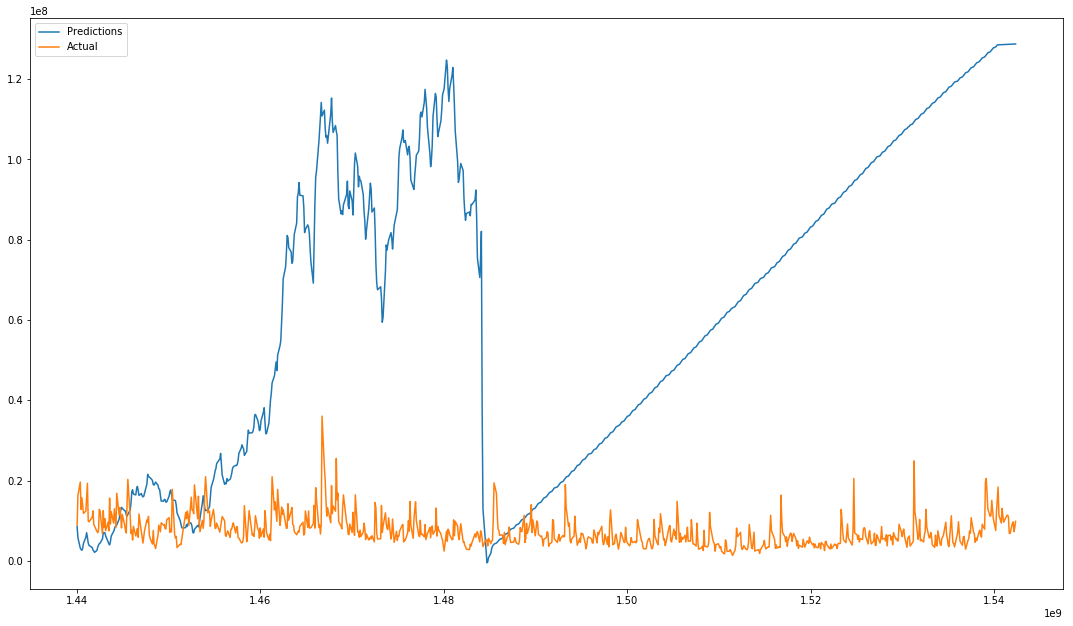

In [209]:
volume_actual = sample_dataframe['volume'].values[train_output_np.shape[0]+20:]
timestamps_predictions = timestamps[train_output_np.shape[0]+20:]

print(len(volume_actual))
print(len(timestamps_predictions))

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
fig.savefig('volume_predictioss.png', dpi=100)
fig.set_size_inches(18.5, 10.5, forward=True)

plt.plot(timestamps_predictions, volume_predictions)
plt.plot(timestamps_predictions, volume_actual)

plt.legend(['Predictions', 'Actual'])
plt.show()
#plt.plot(timestam)

819

819
819


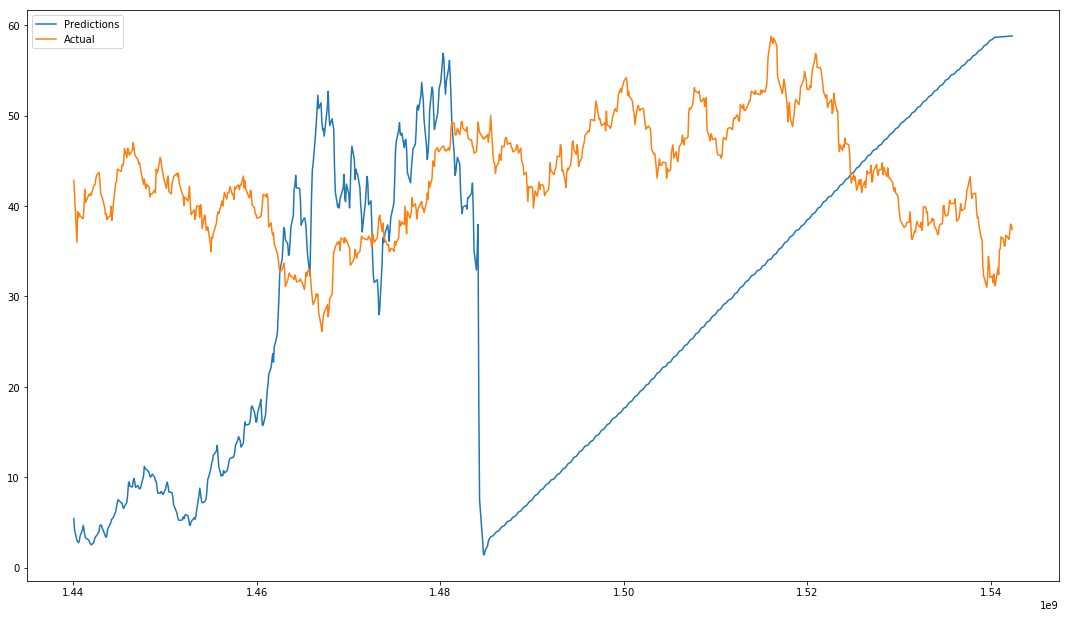

In [211]:
volume_predictions = transformed_values_array[1]
display(len(volume_predictions))

volume_actual = sample_dataframe['open'].values[train_output_np.shape[0]+20:]
timestamps_predictions = timestamps[train_output_np.shape[0]+20:]

print(len(volume_actual))
print(len(timestamps_predictions))

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
fig.savefig('open_predictions.png', dpi=50)
fig.set_size_inches(18.5, 10.5, forward=True)

plt.plot(timestamps_predictions, volume_predictions)
plt.plot(timestamps_predictions, volume_actual)

plt.legend(['Predictions', 'Actual'])
plt.show()
#plt.plot(timestam)

819

819
819


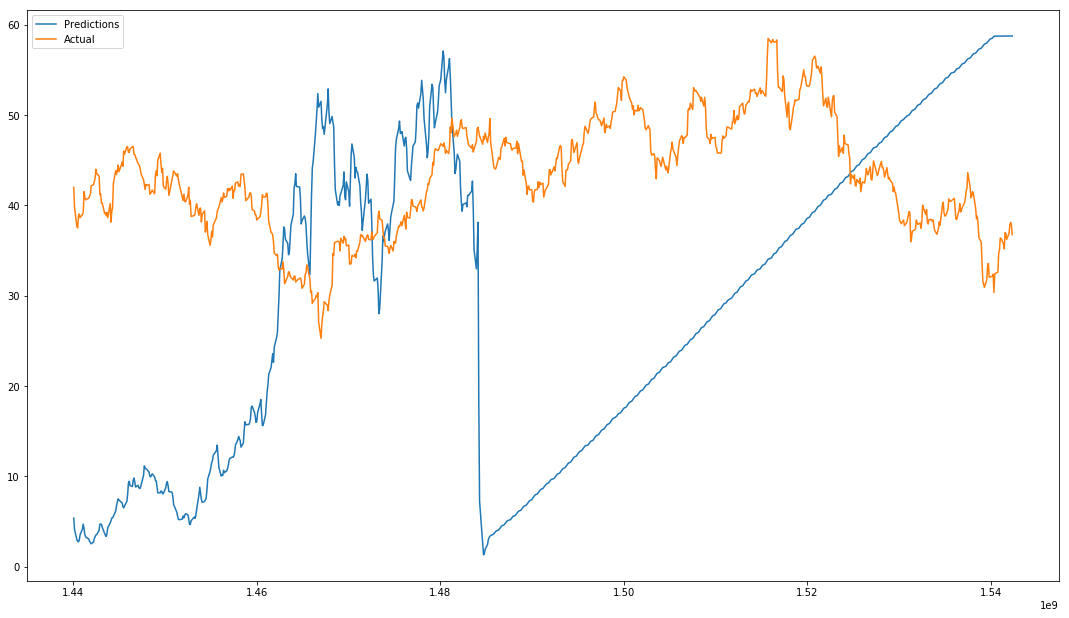

In [212]:
volume_predictions = transformed_values_array[2]
display(len(volume_predictions))

volume_actual = sample_dataframe['close'].values[train_output_np.shape[0]+20:]
timestamps_predictions = timestamps[train_output_np.shape[0]+20:]

print(len(volume_actual))
print(len(timestamps_predictions))

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
fig.savefig('close_predictions.png', dpi=50)
fig.set_size_inches(18.5, 10.5, forward=True)

plt.plot(timestamps_predictions, volume_predictions)
plt.plot(timestamps_predictions, volume_actual)

plt.legend(['Predictions', 'Actual'])
plt.show()

# Check how the model did on the training data

In [214]:
batch_size = 7
train_predictions = predictor.predict(x=training_input_data,
                                    batch_size=batch_size, verbose=2)

In [215]:
# Need to create a transpose of the 2-D array for inverse scaling
train_output = np.transpose(train_predictions)

for i in range(train_output.shape[0]):
    train_output[i].reshape(-1,1)
    
display(train_output)
display(train_output.shape)

array([[-0.9771772 , -0.97809345, -0.9758609 , ..., -0.7770259 ,
        -0.8032716 , -0.85802835],
       [-0.9854341 , -0.98635966, -0.98417646, ..., -0.7811046 ,
        -0.80690175, -0.8614778 ],
       [-0.9795492 , -0.9804575 , -0.9781893 , ..., -0.7807837 ,
        -0.80736536, -0.8623932 ],
       ...,
       [-0.97910666, -0.980037  , -0.9778156 , ..., -0.7820481 ,
        -0.8081789 , -0.8626169 ],
       [-0.98322   , -0.9841404 , -0.981925  , ..., -0.782199  ,
        -0.8082849 , -0.8629315 ],
       [-0.98239875, -0.9833143 , -0.9810859 , ..., -0.7819084 ,
        -0.8081125 , -0.86283946]], dtype=float32)

(7, 2471)

In [216]:
transformed_values_2 = []

for i in range(train_output.shape[0]):
    values = np.array(list(train_output[i]))
    values = values.reshape(-1,1)
    transformed_values_2.append(scaler_array[i].inverse_transform(values))
    
display(transformed_values_2)

[array([[ 1709035.9],
        [ 1645985.2],
        [ 1799616.9],
        ...,
        [15482319. ],
        [13676237. ],
        [ 9908186. ]], dtype=float32), array([[2.2534583],
        [2.2252803],
        [2.2917478],
        ...,
        [8.47427  ],
        [7.688876 ],
        [6.0273085]], dtype=float32), array([[2.3856914],
        [2.3579032],
        [2.4272988],
        ...,
        [8.466922 ],
        [7.6536565],
        [5.97008  ]], dtype=float32), array([[2.7622552],
        [2.7340174],
        [2.8032432],
        ...,
        [8.727448 ],
        [7.9159856],
        [6.241607 ]], dtype=float32), array([[2.0825458],
        [2.0543807],
        [2.121632 ],
        ...,
        [8.048493 ],
        [7.257384 ],
        [5.6092734]], dtype=float32), array([[2.1778698],
        [2.150893 ],
        [2.2158248],
        ...,
        [8.069707 ],
        [7.3051414],
        [5.703473 ]], dtype=float32), array([[1.1314455e+09],
        [1.1312557e+09],
        [1.131

In [217]:
# Generate np array for the predictions
transformed_values_np_2 = np.array(transformed_values_2)
display(transformed_values_np_2.shape)

(7, 2471, 1)

In [220]:
transformed_values_array_2 = list(transformed_values_np_2)
display(len(transformed_values_array_2))
display(len(transformed_values_array_2[0]))
#for i in range(transformed_values_np.shape[0]):
    #transformed_values_array.append(transformed_values_np[i])
display(transformed_values_array_2)

7

2471

[array([[ 1709035.9],
        [ 1645985.2],
        [ 1799616.9],
        ...,
        [15482319. ],
        [13676237. ],
        [ 9908186. ]], dtype=float32), array([[2.2534583],
        [2.2252803],
        [2.2917478],
        ...,
        [8.47427  ],
        [7.688876 ],
        [6.0273085]], dtype=float32), array([[2.3856914],
        [2.3579032],
        [2.4272988],
        ...,
        [8.466922 ],
        [7.6536565],
        [5.97008  ]], dtype=float32), array([[2.7622552],
        [2.7340174],
        [2.8032432],
        ...,
        [8.727448 ],
        [7.9159856],
        [6.241607 ]], dtype=float32), array([[2.0825458],
        [2.0543807],
        [2.121632 ],
        ...,
        [8.048493 ],
        [7.257384 ],
        [5.6092734]], dtype=float32), array([[2.1778698],
        [2.150893 ],
        [2.2158248],
        ...,
        [8.069707 ],
        [7.3051414],
        [5.703473 ]], dtype=float32), array([[1.1314455e+09],
        [1.1312557e+09],
        [1.131

In [224]:
volume_predictions = transformed_values_array_2[0]
display(len(volume_predictions))

2471

2471
2471


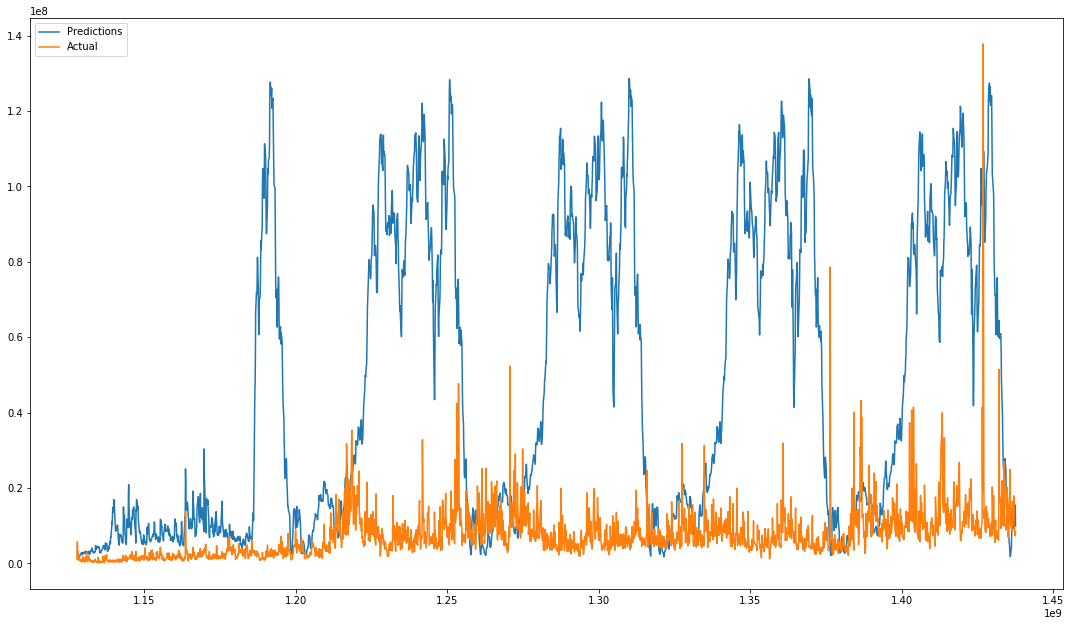

In [226]:
volume_actual = sample_dataframe['volume'].values[:len(volume_predictions)]
timestamps_predictions = timestamps[:len(volume_predictions)]

print(len(volume_actual))
print(len(timestamps_predictions))

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
fig.savefig('volume_predictioss.png', dpi=50)
fig.set_size_inches(18.5, 10.5, forward=True)

plt.plot(timestamps_predictions, volume_predictions)
plt.plot(timestamps_predictions, volume_actual)

plt.legend(['Predictions', 'Actual'])
plt.show()

# AutoML model development<a id='automl_development'></a>

## Options for the libraries to use :

### 1. Auto-Keras
### 2. Auto-sklearn
### 3. TPOT
### 4. H20.ai

## 1. Model Development using AutoKeras

In [1]:
# Import the AutoML libraries
import autokeras as ak
#import ak.supervised

ImportError: DLL load failed: %1 is not a valid Win32 application.